# Artificial Intelligence for Trading (Lab Lecture 1 — 2021-10-21)
**Contacts: novella@di.uniroma1.it, coletta@di.uniroma1.it, prata@di.uniroma1.it**

## Manipulating Real Stock Market Dataset

What you will learn:

- how _**O**pen **H**igh **L**ow **C**lose_ (OHLC) datasets are generated, and processing them with ease to derive useful insight 
- computing daily return of an asset and use it to evaluate the risk of an investment 
- designing a simple trading strategy through temporal statistics over time series
- evaluating assets correlation 

At the end of the lesson we will present **Homework 1!!!**  🎉

### Download this Notebook
This notebook and more is available for download at: https://github.com/matteoprata/AI4Trading

### From to Orders to Stock Market Dataset

A **limit order book (LOB) is a record of outstanding limit orders** maintained at the exchange. A limit order is a type of order to buy or sell a security at a specific price or better. The orders are executed at or better than the given limit price when the market moves to the pre-specified price.

<img src="data/press_images/LOB_ex.png" width="800" height="1100"/>

### OHLC Dataset
An **OHLC dataset is a record of the open, high, low, and close midprices of a stock for a given period**. **It can highlight increasing or decreasing momentum**. When the open and close are far apart it shows strong momentum, and when the open and close are close together it shows indecision or weak momentum. The high and low show the full price range of the period, useful in assessing volatility. There several patterns traders watch for on OHLC charts.

<img src="data/press_images/AAPL_OHLC.png" width="600" height="1000"/>

Notice: a trading day lasts for 6.5 hours, from 9:30 a.m. and ends at 4:00 p.m.. There is no trading activity during weekends and holidays. 

You can download real stock market dataset at https://finance.yahoo.com, finest granulatiry is daily. 
**In the next lab lecture you will work with granularity of your choice!**
 






## Introduction to Pandas

We will start by using **pandas** (<a href="https://pandas.pydata.org/docs/">doc</a>), which is a Python package providing fast, flexible, and expressive data structures designed to make working
with “relational” or “labeled” data both easy and intuitive. It aims to be a high-level building
block for doing practical, real world **data analysis** in Python.

The two primary data structures of pandas, **Series** (1-dimensional) and **DataFrame** (2-dimensional), handle
the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering.
pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment.

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.width = 1200

import matplotlib
matplotlib.rc('figure', figsize=(10,3), dpi=200)

##### Creating a DataFrame 
A **DataFrame** is a 2-dimensional data structure that can store data of different types (including characters,
integers, floating point values, categorical data and more) in columns. It is similar to a spreadsheet, a
SQL table or the data.frame in R. Let us create one and print it.

In [2]:
# creating a dataframe by columns
data_cols = {"Name"  :["Alice", "Bob", "Claire"], 
             "Order" :["buy", "sell", "sell"], 
             "Volume":[14, 23, 44],
             "Price" :[120, 100, 800]}  # as a dictionary, column wise

df = pd.DataFrame(data_cols)
print(df)

     Name Order  Volume  Price
0   Alice   buy      14    120
1     Bob  sell      23    100
2  Claire  sell      44    800


In [3]:
# equivalently by rows
data_rows = [("Alice", "buy", 14, 120), 
             ("Bob", "sell", 23, 100), 
             ("Claire", "sell", 44, 800)]  # as a list, row wise

df = pd.DataFrame(data_rows, columns=['Name','Order', 'Volume', 'Price'])
print(df)

     Name Order  Volume  Price
0   Alice   buy      14    120
1     Bob  sell      23    100
2  Claire  sell      44    800


We will be dealing with data coming from **CSV** (**C**omma **S**eparated **V**alues) files. Two years: from 01-09-2019 to 01-09-2021.

In [4]:
!dir data

 Il volume nell'unit… D Š Data
 Numero di serie del volume: FE3F-6706

 Directory di D:\LaureaMagistrale\SecondoAnno\PrimoSemestre\AI4T\AI4Trading\data

28/10/2021  13:43    <DIR>          .
28/10/2021  13:43    <DIR>          ..
21/10/2021  13:40            37.498 AAPL.csv
28/10/2021  13:43            27.960 AAPL_missing.csv
21/10/2021  13:40            40.365 AMZN.csv
21/10/2021  13:40            35.820 CSCO.csv
21/10/2021  13:40            37.984 DIS.csv
21/10/2021  13:40            38.305 FB.csv
21/10/2021  13:40            40.295 GOOG.csv
21/10/2021  13:40            35.734 KO.csv
21/10/2021  13:40            38.344 MSFT.csv
21/10/2021  13:40            37.898 NFLX.csv
21/10/2021  13:40            37.855 PEP.csv
28/10/2021  13:43    <DIR>          press_images
21/10/2021  13:40            35.768 VZ.csv
              12 File        443.826 byte
               3 Directory  773.765.890.048 byte disponibili


In [5]:
pwd

'D:\\LaureaMagistrale\\SecondoAnno\\PrimoSemestre\\AI4T\\AI4Trading'

##### Reading and visualizing a DataFrame stored as a CSV file

In [15]:
df = pd.read_csv("data/AAPL.csv")
print(df)

           Date        Open        High         Low       Close   Adj Close     Volume
0    2019-09-03   51.607498   51.744999   51.055000   51.424999   50.594364   80092000
1    2019-09-04   52.097500   52.369999   51.830002   52.297501   51.452770   76752400
2    2019-09-05   53.000000   53.492500   52.877499   53.320000   52.458759   95654800
3    2019-09-06   53.512501   53.605000   53.127499   53.314999   52.453835   77449200
4    2019-09-09   53.709999   54.110001   52.767502   53.542500   52.677662  109237600
..          ...         ...         ...         ...         ...         ...        ...
499  2021-08-25  149.809998  150.320007  147.800003  148.360001  148.360001   58991300
500  2021-08-26  148.350006  149.119995  147.509995  147.539993  147.539993   48597200
501  2021-08-27  147.479996  148.750000  146.830002  148.600006  148.600006   55721500
502  2021-08-30  149.000000  153.490005  148.610001  153.119995  153.119995   90956700
503  2021-08-31  152.660004  152.800003  15

In [7]:
print(df.head(5))

         Date       Open       High        Low      Close  Adj Close     Volume
0  2019-09-03  51.607498  51.744999  51.055000  51.424999  50.594364   80092000
1  2019-09-04  52.097500  52.369999  51.830002  52.297501  51.452770   76752400
2  2019-09-05  53.000000  53.492500  52.877499  53.320000  52.458759   95654800
3  2019-09-06  53.512501  53.605000  53.127499  53.314999  52.453835   77449200
4  2019-09-09  53.709999  54.110001  52.767502  53.542500  52.677662  109237600


##### Indexing by integer or label index

In [16]:
# 
print(df.iloc[0:30:5, [0,2,3]]) # rows 0 to 29 with step 5; columns 0, 2, 3   

          Date       High        Low
0   2019-09-03  51.744999  51.055000
5   2019-09-10  54.195000  52.927502
10  2019-09-17  55.205002  54.779999
15  2019-09-24  55.622501  54.297501
20  2019-10-01  57.055000  56.049999
25  2019-10-08  57.014999  56.082500


In [32]:
# .loc is primarily label based
# nb: This use is not an integer position along the index, i.e. df.loc[0, df.columns] does not take "the first row",
#      but the one labeled "0"
print(df.loc[0:10:2, df.columns.values]) # rows 0 to 29 with step 5; columns 0, 2, 3  

          Date       Open       High        Low      Close  Adj Close     Volume
0   2019-09-03  51.607498  51.744999  51.055000  51.424999  50.594364   80092000
2   2019-09-05  53.000000  53.492500  52.877499  53.320000  52.458759   95654800
4   2019-09-09  53.709999  54.110001  52.767502  53.542500  52.677662  109237600
6   2019-09-11  54.517502  55.927502  54.432499  55.897499  54.994625  177158400
8   2019-09-13  55.000000  55.197498  54.255001  54.687500  53.804165  159053200
10  2019-09-17  54.990002  55.205002  54.779999  55.174999  54.283794   73274800


In [9]:
print(df.columns)  # horizontal index (header)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [10]:
print(df.index)   # vertical index

RangeIndex(start=0, stop=504, step=1)


In [7]:
date_start, date_end = "2019-10-09", "2019-11-13"
df_out = df.loc[date_start: date_end, ["Open", "Close"]]  # WARNING! This won't work 
print(df_out)

Empty DataFrame
Columns: [Open, Close]
Index: []


In [8]:
df = df.set_index('Date')
df_out = df.loc[date_start: date_end: 5, ["Open", "Close"]]  # OK! rows 0 to 29; columns 0, 2, 3  
print(df_out)

                 Open      Close
Date                            
2019-10-09  56.757500  56.757500
2019-10-16  58.342499  58.592499
2019-10-23  60.525002  60.794998
2019-10-30  61.189999  60.814999
2019-11-06  64.192497  64.309998
2019-11-13  65.282501  66.117500


In [13]:
# alternatively, do when reading 
# df = pd.read_csv("data/AAPL.csv", parse_dates=True, index_col="Date")

In [9]:
# Notice this semantic equivalence 
df1 = df[["Open", "Close"]]
df2 = df.loc[:, ["Open", "Close"]] # take ALL ROWS from columns ["O","C"]

# Notice this semantic equivalence
df3 = df[:10]
df4 = df.iloc[:10]

In [11]:
df3,df4

(                 Open       High        Low      Close  Adj Close     Volume
 Date                                                                        
 2019-09-03  51.607498  51.744999  51.055000  51.424999  50.594364   80092000
 2019-09-04  52.097500  52.369999  51.830002  52.297501  51.452770   76752400
 2019-09-05  53.000000  53.492500  52.877499  53.320000  52.458759   95654800
 2019-09-06  53.512501  53.605000  53.127499  53.314999  52.453835   77449200
 2019-09-09  53.709999  54.110001  52.767502  53.542500  52.677662  109237600
 2019-09-10  53.465000  54.195000  52.927502  54.174999  53.299946  127111600
 2019-09-11  54.517502  55.927502  54.432499  55.897499  54.994625  177158400
 2019-09-12  56.200001  56.605000  55.715000  55.772499  54.871643  128906800
 2019-09-13  55.000000  55.197498  54.255001  54.687500  53.804165  159053200
 2019-09-16  54.432499  55.032501  54.389999  54.974998  54.087029   84632400,
                  Open       High        Low      Close  Adj Cl

##### Plotting price curves

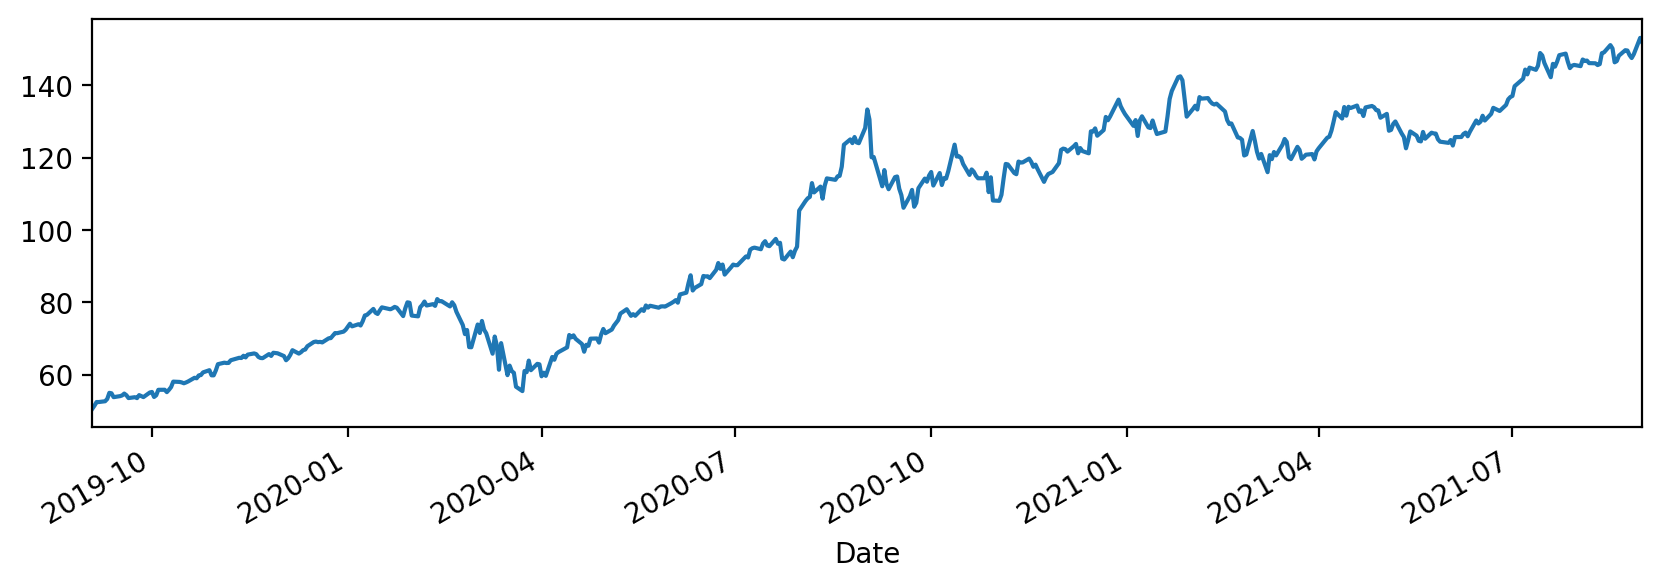

In [33]:
# plot the adjusted close for Apple
df_ap = pd.read_csv("data/AAPL.csv", parse_dates=True, index_col="Date")
df_ap['Adj Close'].plot()
plt.show()

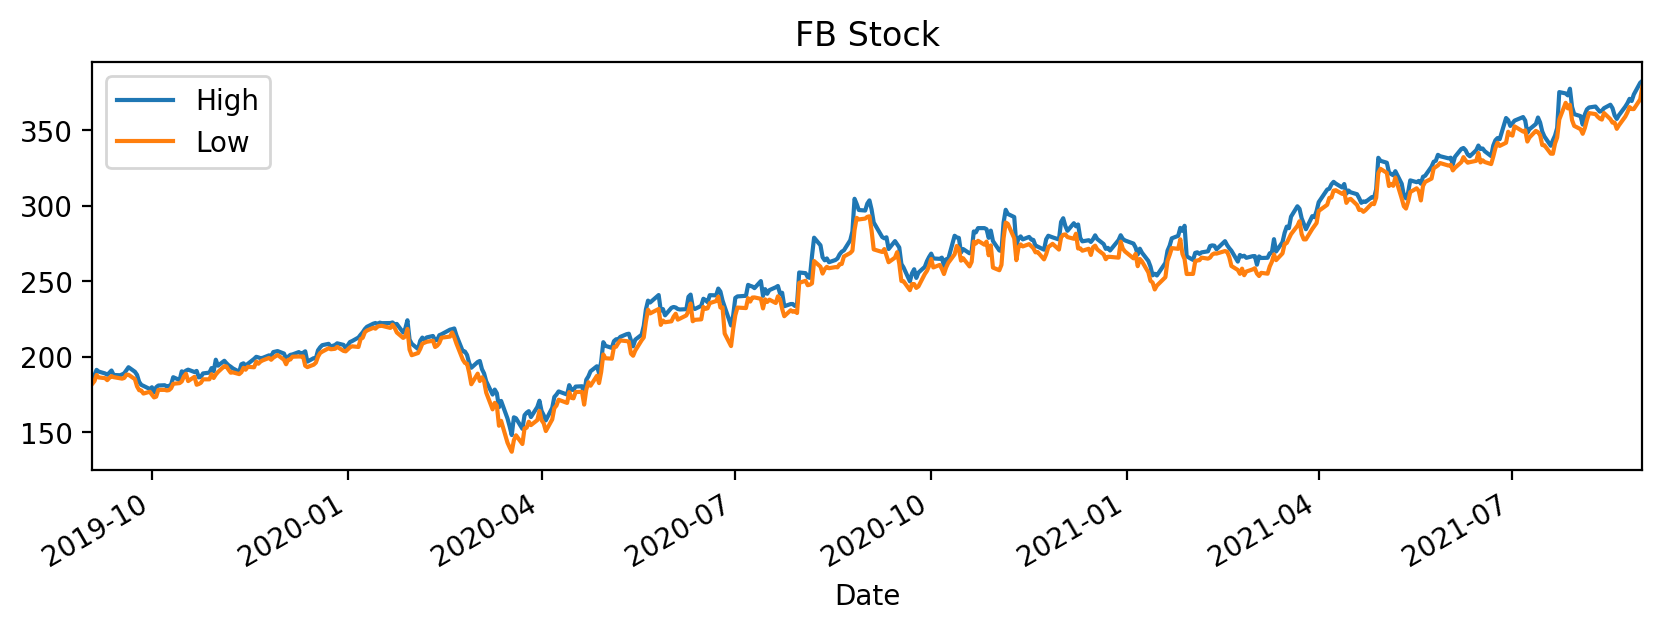

In [16]:
# Plot high and low for Facebook
df_fb = pd.read_csv("data/FB.csv", parse_dates=True, index_col="Date")
df_fb[['High', 'Low']].plot(title="FB Stock")
plt.show()

##### Plotting candle sticks

A candlestick is a type of _price chart_ used in technical analysis that displays the high, low, open, and closing prices of a security for a specific period. It **tells investors whether the closing price was higher or lower than the opening price** (black/red if the stock closed lower, white/green if the stock closed higher).

<img src="data/press_images/AAPL_candle.png" />

<img src="data/press_images/candles.png" width="600" height="1000"/>

In [34]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])
fig.show()

##### Plotting Relative Price

In [25]:
!dir data

 Il volume nell'unit… D Š Data
 Numero di serie del volume: FE3F-6706

 Directory di D:\LaureaMagistrale\SecondoAnno\PrimoSemestre\AI4T\AI4Trading\data

21/10/2021  14:40    <DIR>          .
21/10/2021  14:40    <DIR>          ..
21/10/2021  14:40            37.498 AAPL.csv
21/10/2021  14:40            40.365 AMZN.csv
21/10/2021  14:40            35.820 CSCO.csv
21/10/2021  14:40            37.984 DIS.csv
21/10/2021  14:40            38.305 FB.csv
21/10/2021  14:40            40.295 GOOG.csv
21/10/2021  14:40            35.734 KO.csv
21/10/2021  14:40            38.344 MSFT.csv
21/10/2021  14:40            37.898 NFLX.csv
21/10/2021  14:40            37.855 PEP.csv
21/10/2021  14:40    <DIR>          press_images
21/10/2021  14:40            35.768 VZ.csv
              11 File        415.866 byte
               3 Directory  764.394.029.056 byte disponibili


In [35]:
ALL_SYMBOLS = ["AAPL", "MSFT", "AMZN", "CSCO", "DIS", "FB", "GOOG", "KO", "PEP", "NFLX", "VZ"]
date_range = ('2019-09-01', '2021-09-01')

In [41]:
# Task: join an empty DataFrame with index, with the Apple Dataframe.
# dates is formatted as YYYY-MM-DD
dates = pd.date_range(*date_range) #Returns the range of equally spaced time points,
                                    #difference between two adjacent points is specified by the given frequency (default: D)

# An empy dataframe
df1 = pd.DataFrame(index=dates) # the dataframe only with the Dates as index

# join with Apple stock, attempt 4
dfAAPL = pd.read_csv("data/AAPL.csv", index_col="Date", parse_dates=True, usecols=["Date", "Adj Close"])
df1 = df1.join(dfAAPL, how="inner") # inner removes unexisting trading days that would give NaN

print(df1)

# df1 = dfAAPL.loc[date_range[0]:date_range[1]] # This os also a valid, possibly better, alternative


# let's make a function out of the above

             Adj Close
2019-09-03   50.594364
2019-09-04   51.452770
2019-09-05   52.458759
2019-09-06   52.453835
2019-09-09   52.677662
...                ...
2021-08-25  148.360001
2021-08-26  147.539993
2021-08-27  148.600006
2021-08-30  153.119995
2021-08-31  151.830002

[504 rows x 1 columns]


In [42]:
def adjusted_close_symbols(symbols, date_range):
    """ Joins an empty DataFrame with index, with multiple stocks dataframes. """

    # dates is formatted as YYYY-MM-DD
    dates = pd.date_range(*date_range)

    # An empty dataframe
    df1 = pd.DataFrame(index=dates) # the dataframe only with the index

    for sym in symbols:
        path_to_file = os.path.join("data", "%s.csv" % sym)
        dfSYM = pd.read_csv(path_to_file, index_col="Date", parse_dates=True, usecols=["Date", "Adj Close"]) # na_values=['nan']
        dfSYM = dfSYM.rename(columns= {'Adj Close': sym})
        df1 = df1.join(dfSYM, how="inner")
    return df1

df = adjusted_close_symbols(ALL_SYMBOLS, date_range)
df

AAPL        MSFT         AMZN       CSCO         DIS          FB         GOOG         KO         PEP        NFLX         VZ
2019-09-03   50.594364  133.285645  1789.839966  43.346085  135.498199  182.389999  1168.390015  51.474342  128.853714  289.290009  52.648903
2019-09-04   51.452770  134.843460  1800.619995  44.110470  137.068787  187.139999  1181.410034  51.911831  130.437866  291.519989  52.775894
2019-09-05   52.458759  137.214462  1840.719971  45.135860  138.013123  190.899994  1211.380005  51.306805  128.347198  293.250000  53.147812
2019-09-06   52.453835  136.283722  1833.510010  45.527374  138.718903  187.490005  1204.930054  51.409191  129.659195  290.170013  53.574154
2019-09-09   52.677662  134.735703  1831.349976  45.285011  138.003189  188.759995  1204.410034  50.748310  128.743622  294.339996  53.211308
...                ...         ...          ...        ...         ...         ...          ...        ...         ...         ...        ...
2021-08-25  148.360001  302.010010  3299.179932  58.951748  178.309998  368.390015  2859.000000  55.650002  154.143448  547.580017  54.285309
2021-08-26  147.539993  299.089996  3316.000000  58.802757  176.559998  364.380005  2842.459961  55.123970  153.577332  550.119995  53.959179
2021-08-27  148.600006  299.720001  3349.629883  58.623966  180.139999  372.630005  2891.010010  55.233147  153.885223  558.919983  54.127186
2021-08-30  153.119995  303.589996  3421.570068  58.733227  179.979996  380.660004  2909.389893  55.759178  154.938004  566.179993  54.127186
2021-08-31  151.830002  301.880005  3470.790039  58.623966  181.300003  379.380005  2909.239990  55.888203  155.325348  569.190002  54.354485

[504 rows x 11 columns]

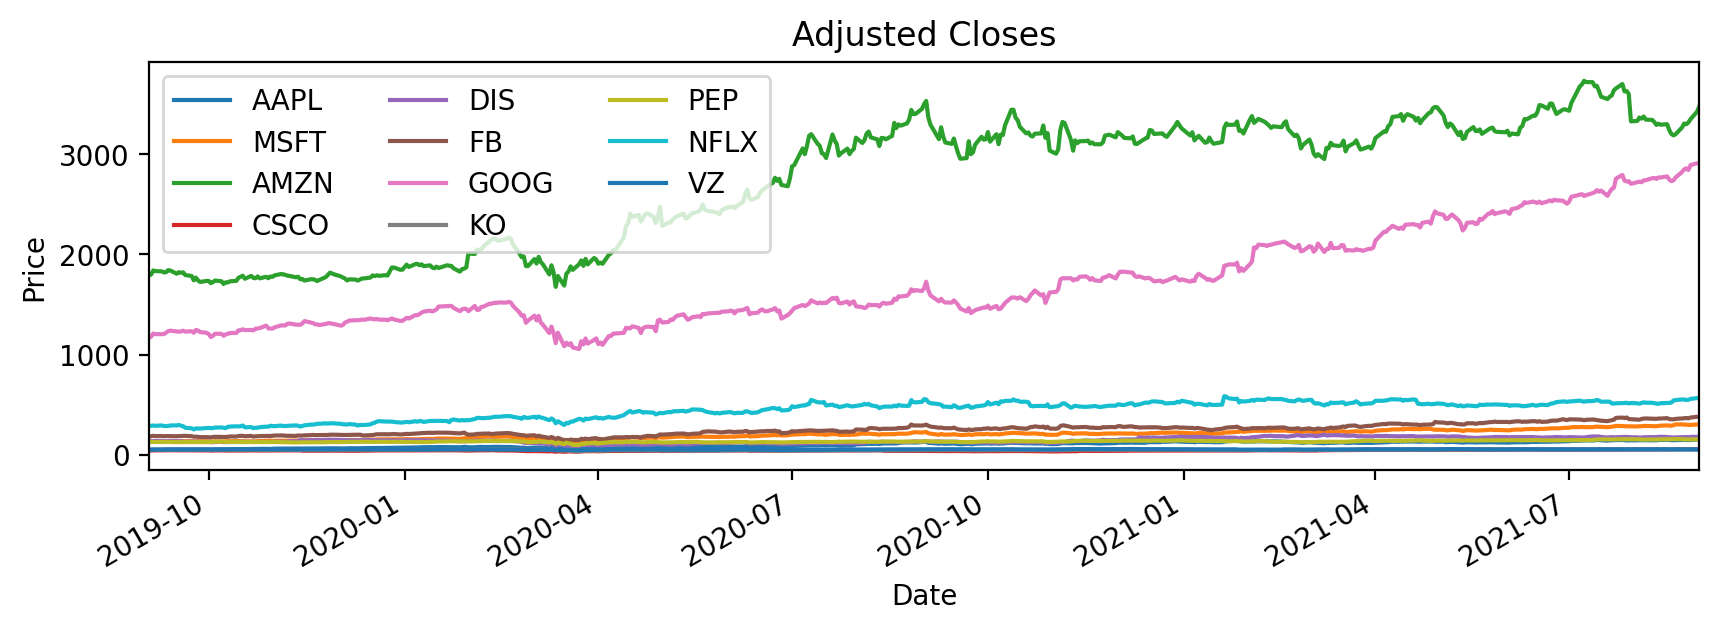

In [43]:
# Normalising and plotting multiple stock prices 
df = adjusted_close_symbols(ALL_SYMBOLS, date_range)

# plotting procedure 
ax = df.plot(title="Adjusted Closes")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
plt.legend(loc='upper left', ncol=3) # better visualize the legend
plt.show()

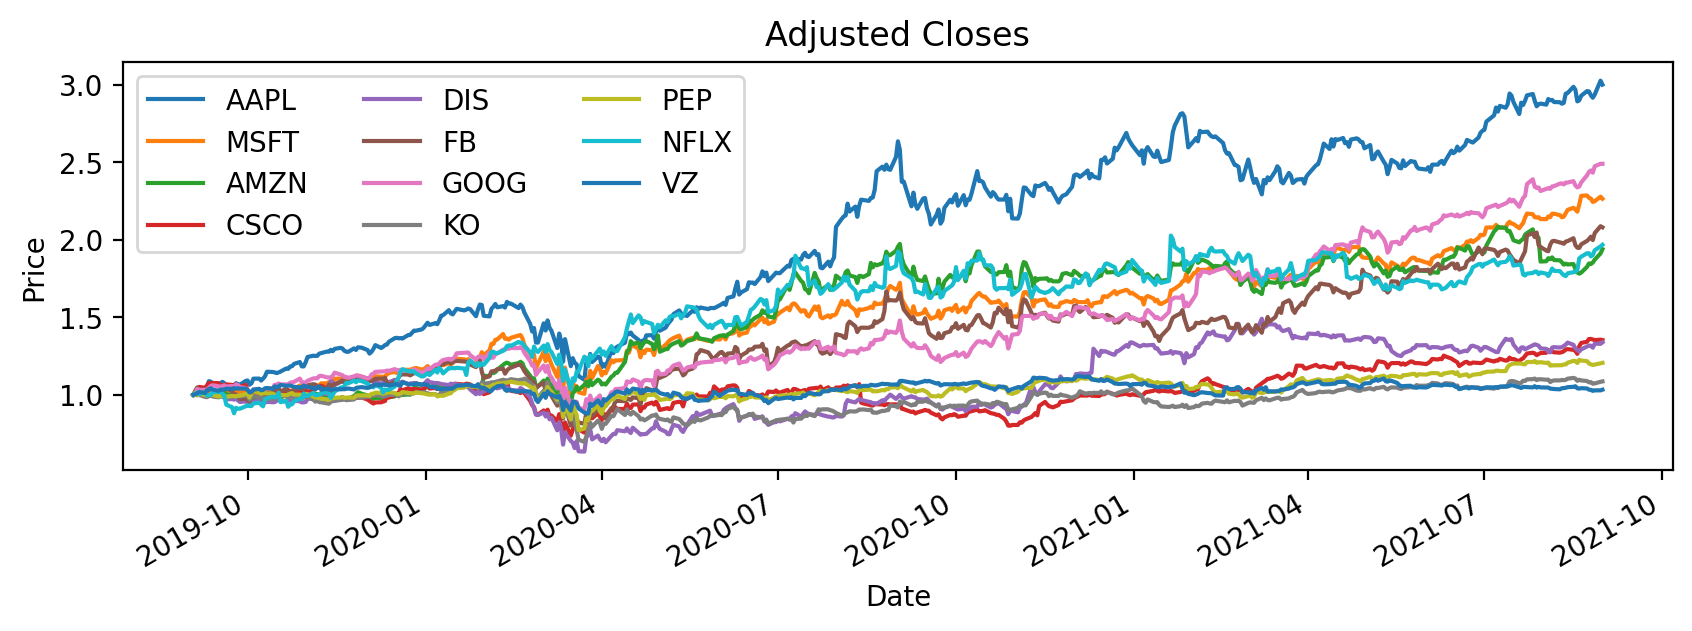

In [22]:
# What to do if you want all the stocks to start at 1.0?
# We want to divide by day 1
df_norm = df / df.iloc[0,:]

# plotting procedure 
ax = df_norm.plot(title="Adjusted Closes")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
plt.legend(loc='upper left', ncol=3)  # better visualize the legend
plt.show()

##### Plotting Daily Returns 

The **daily return (or intraday return) measures the return generated by a stock, based on its price from the opening of a trading day to its close**. A positive return means the stock has grown in value, while a negative return means it has lost value. A stock with lower positive and negative daily returns is typically less risky than a stock with higher daily returns, which creates larger swings in value.

$$ r(t) = \frac{m(t)-m(t-1)}{m(t-1)} = \frac{m(t)}{m(t-1)} -1$$

In [58]:
df = adjusted_close_symbols(ALL_SYMBOLS, date_range)
df_ret = df / df.shift(+1) - 1 # +shift -> DOWN; -shift -> UP
df_ret = df_ret[1:] #The first row is filledwith Nan

# Focus on 2 stocks to see how they (their DRs) are cor
stock1, stock2 = "MSFT", "GOOG"
df_ret_s1_s2 = df_ret[[stock1, stock2]]
df_ret_s1_s2

MSFT      GOOG
2019-09-04  0.011688  0.011144
2019-09-05  0.017583  0.025368
2019-09-06 -0.006783 -0.005324
2019-09-09 -0.011359 -0.000432
2019-09-10 -0.010471  0.001320
...              ...       ...
2021-08-25 -0.002016  0.003873
2021-08-26 -0.009669 -0.005785
2021-08-27  0.002106  0.017080
2021-08-30  0.012912  0.006358
2021-08-31 -0.005633 -0.000052

[503 rows x 2 columns]

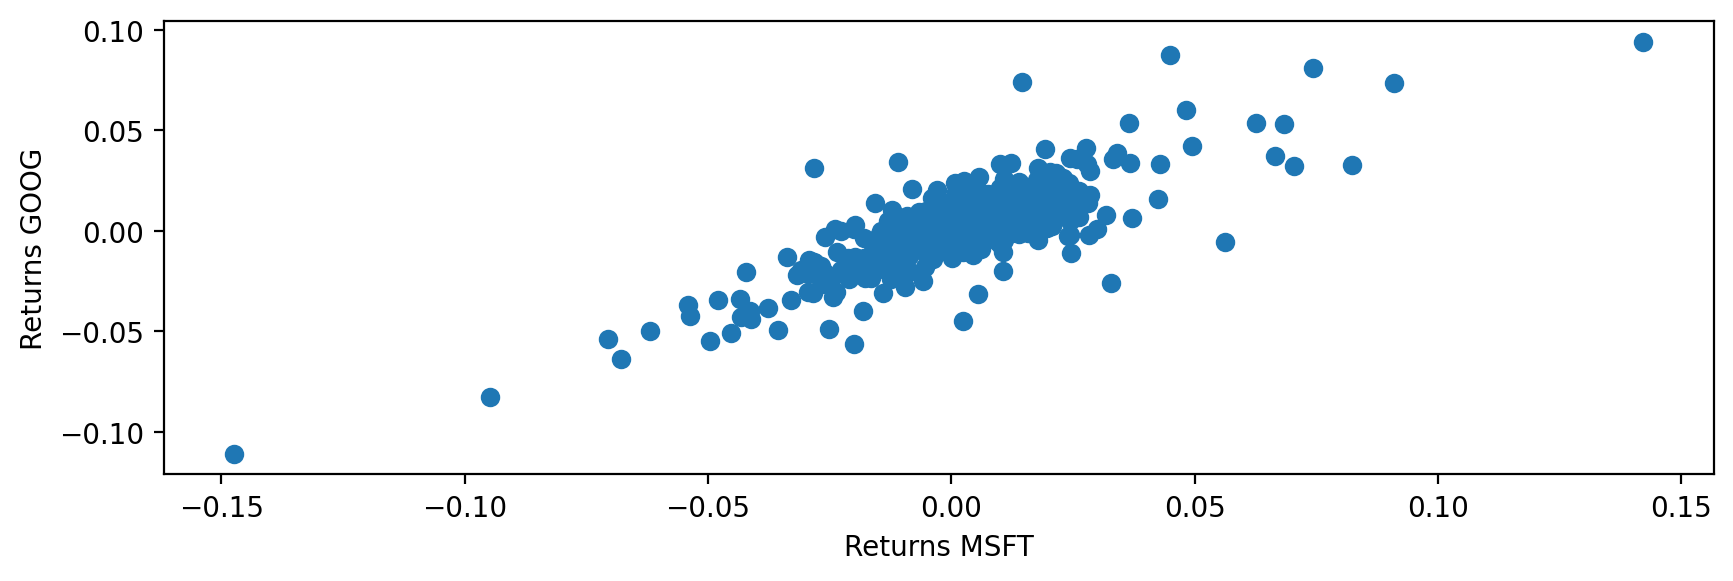

In [59]:
plt.scatter(df_ret_s1_s2[stock1], df_ret_s1_s2[stock2])
plt.xlabel('Returns ' + stock1)
plt.ylabel('Returns ' + stock2)
plt.show()

##### Stocks Correlation
Pearson correlation coefficient ( https://en.wikipedia.org/wiki/Pearson_correlation_coefficient )
<img src="data/press_images/correlation.png" />

In [60]:
corr = df_ret.corr()
corr

AAPL      MSFT      AMZN      CSCO       DIS        FB      GOOG        KO       PEP      NFLX        VZ
AAPL  1.000000  0.804026  0.665030  0.606935  0.445915  0.711383  0.703822  0.507074  0.619634  0.509674  0.437573
MSFT  0.804026  1.000000  0.706032  0.665470  0.507525  0.715548  0.811327  0.541404  0.698078  0.558217  0.500206
AMZN  0.665030  0.706032  1.000000  0.435891  0.316014  0.648617  0.650695  0.278388  0.445492  0.622051  0.296427
CSCO  0.606935  0.665470  0.435891  1.000000  0.573283  0.502233  0.597204  0.556511  0.642101  0.294453  0.569409
DIS   0.445915  0.507525  0.316014  0.573283  1.000000  0.424294  0.533569  0.597301  0.489400  0.212427  0.428579
FB    0.711383  0.715548  0.648617  0.502233  0.424294  1.000000  0.751557  0.384382  0.502274  0.534437  0.353597
GOOG  0.703822  0.811327  0.650695  0.597204  0.533569  0.751557  1.000000  0.537684  0.591934  0.503855  0.477852
KO    0.507074  0.541404  0.278388  0.556511  0.597301  0.384382  0.537684  1.000000  0.759283  0.184933  0.657673
PEP   0.619634  0.698078  0.445492  0.642101  0.489400  0.502274  0.591934  0.759283  1.000000  0.380748  0.676766
NFLX  0.509674  0.558217  0.622051  0.294453  0.212427  0.534437  0.503855  0.184933  0.380748  1.000000  0.224936
VZ    0.437573  0.500206  0.296427  0.569409  0.428579  0.353597  0.477852  0.657673  0.676766  0.224936  1.000000

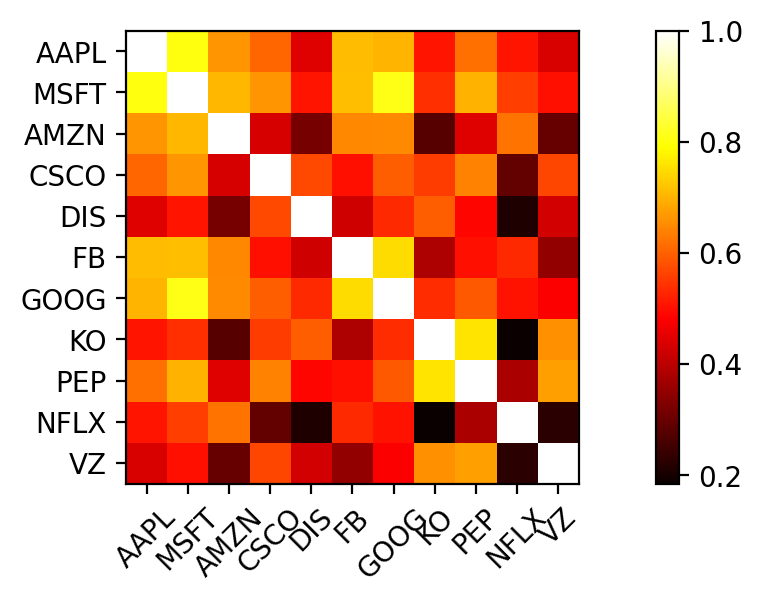

In [61]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

##### Risk of a Stock

In [62]:
df_ret.mean()

AAPL    0.002459
MSFT    0.001853
AMZN    0.001513
CSCO    0.000813
DIS     0.000868
FB      0.001737
GOOG    0.002007
KO      0.000304
PEP     0.000524
NFLX    0.001665
VZ      0.000140
dtype: float64

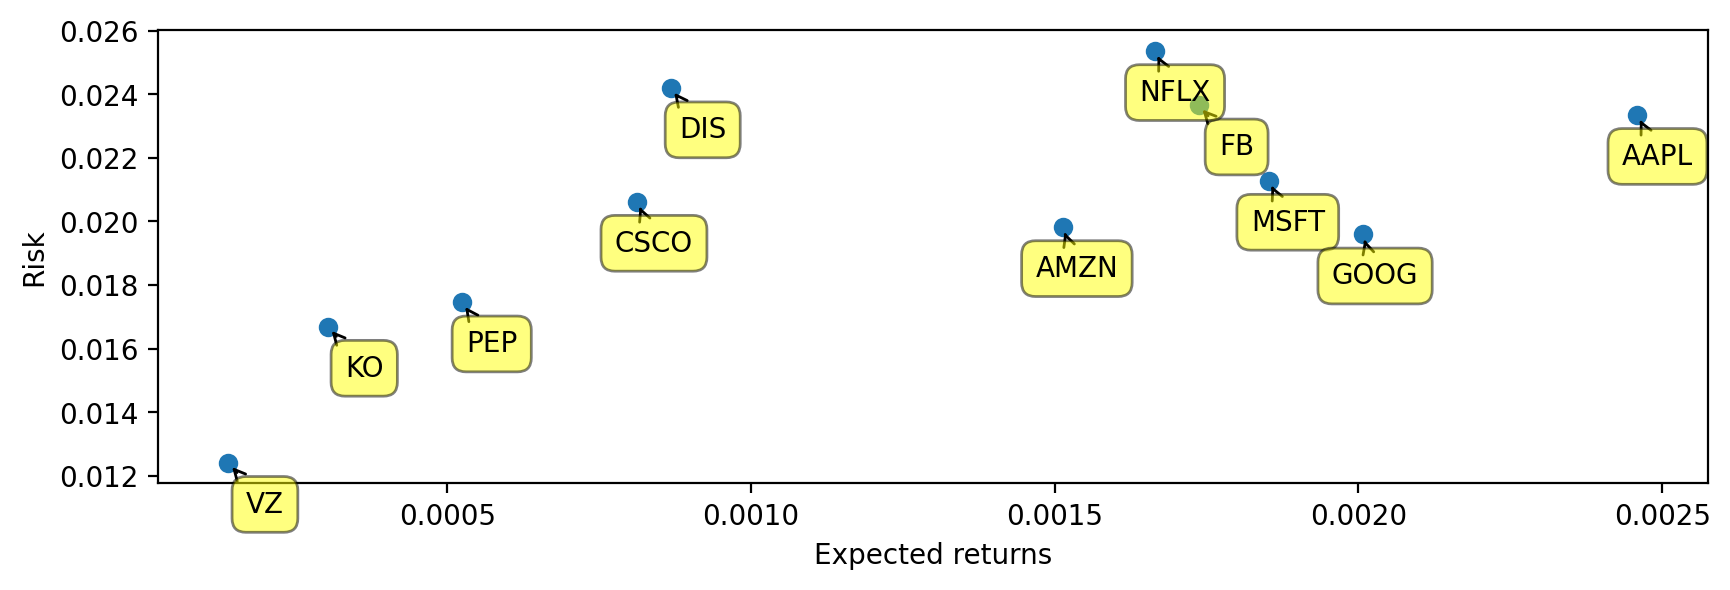

In [63]:
plt.scatter(df_ret.mean(), df_ret.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(df_ret.columns, df_ret.mean(), df_ret.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

##### Temporal Statistics
Pandas makes it easy to compute convenient global statistics on a dataframe: **mean, median, std, sum** and
<a href="https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats">more</a>; and rolling
statistics: **rolling mean, rolling std** and <a href="http://pandas.pydata.org/pandas-docs/stable/computation.html?highlight=rolling%20statistics#moving-rolling-statistics-moments">more</a>.

In [64]:
df = adjusted_close_symbols(ALL_SYMBOLS, date_range)
print(df.max(axis=0)) # axis 0 means, iterate over the rows to find the max

AAPL     153.119995
MSFT     304.649994
AMZN    3731.409912
CSCO      58.951748
DIS      201.910004
FB       380.660004
GOOG    2909.389893
KO        57.049438
PEP      157.828201
NFLX     586.340027
VZ        59.063019
dtype: float64


An example of rolling mean.

<img src="data/press_images/rolling_mean.gif" hight="500" width="500"/>

#### Q: what is meant by global mean? 

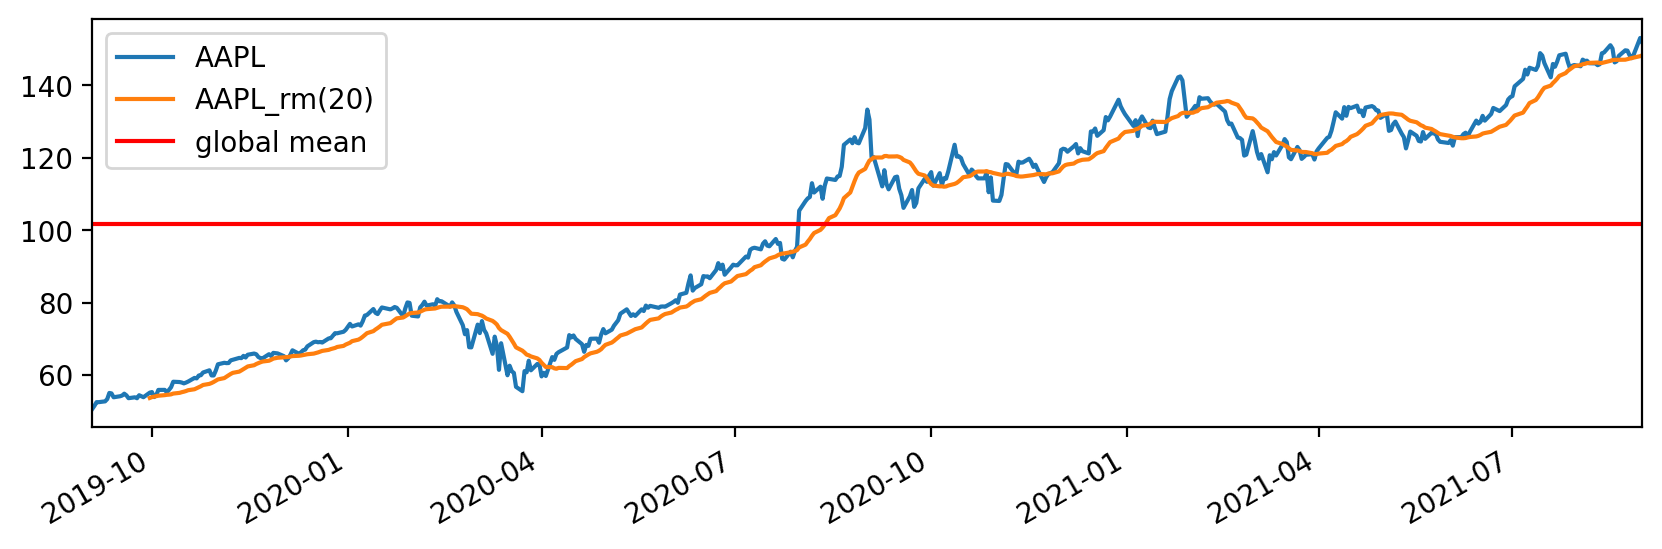

In [65]:
# Task: print rolling statistics [mean]. We take snapshots of the statistic over time windows, and save it,
# move the window of one unit and star again.

df = adjusted_close_symbols(["AAPL"], date_range)

window_size = 20 # days
df["AAPL_rm({})".format(window_size)] = df.rolling(window_size).mean()  # add a column to the dataframe

ax = df.plot()
ax.axhline(y=df.mean()[0], color='r', linestyle='-', label="global mean") 

plt.legend()
plt.show()

## Introduction to NumPy
**NumPy** (<a href="https://numpy.org/doc/1.19/">doc</a>) is an open source project aiming to enable numerical computing with Python. NumPy is developed in
the open on GitHub, through the consensus of the NumPy and wider scientific Python community.

NumPy’s main object is the **homogeneous multidimensional array**. It is a table of elements (usually numbers),
all of the same type, indexed by a tuple of non-negative integers. In NumPy dimensions are called axes.
NumPy’s array class is called ndarray. It is also known by the alias array.

It is related to pandas as a DataFrame is a wrapper of an ndarray. Treating data as ndarrays rather than
just DataFrames will give you access to many additional routines.

In [31]:
import numpy as np

In [32]:
# creating ndarrays
nd1 = np.array([1,2,3])  # 1D
nd2 = np.array([[1,2,3], [4,5,6], [7,8,9]])  # 2D

print(nd1)
print(nd2)

[1 2 3]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [33]:
# init ndarrays
nd_zeros = np.zeros((3,3))  # also ones
nd_rand_int = np.random.randint(0,100,(4,4))
nd_rand = np.random.rand(4,4)

print(nd_zeros)
print(nd_rand_int)
print(nd_rand)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[41 78 21 89]
 [96 48 43 94]
 [ 0 91 25  5]
 [82 53 73 34]]
[[0.79760759 0.96518176 0.22448622 0.98402333]
 [0.21299855 0.03429071 0.90856552 0.47527461]
 [0.27239814 0.95406866 0.86692412 0.87565558]
 [0.04893846 0.17735308 0.5637304  0.24493952]]


In [34]:
# Task: extract an ndarray from a DataFrame object and play with slicing 
df = adjusted_close_symbols(["AAPL", "FB", "MSFT", "VZ"], ('2020-10-01', '2020-10-09'))

nd1 = df.values
print(nd1, type(nd1))

# access a value
print("\nElement in 0,0:", nd1[0,0])  # [row, column]
print("\nElement in 2,1:", nd1[2,1])  # [row, column]

# access slices
print(nd1[0:3,1:3])  # [row, column]

# access rows and columns
print("\nRow 0:", nd1[0,:])
print("\nColumn 0:", nd1[:,0])

# negative indices
print(nd1[-1, 1:3])

# Replace slices
nd1[:3,:2] = nd1[-3:,-2:]
print(nd1)

[[116.04364  266.630005 210.528198  56.273159]
 [112.297729 259.940002 204.315216  56.074383]
 [115.755478 264.649994 208.467117  56.471939]
 [112.436829 258.660004 204.03775   56.282619]
 [114.344559 258.119995 207.922104  56.424606]
 [114.23526  263.76001  208.665298  56.623581]
 [116.222481 264.450012 213.847733  56.757519]] <class 'numpy.ndarray'>

Element in 0,0: 116.04364

Element in 2,1: 264.649994
[[266.630005 210.528198]
 [259.940002 204.315216]
 [264.649994 208.467117]]

Row 0: [116.04364  266.630005 210.528198  56.273159]

Column 0: [116.04364  112.297729 115.755478 112.436829 114.344559 114.23526
 116.222481]
[264.450012 213.847733]
[[207.922104  56.424606 210.528198  56.273159]
 [208.665298  56.623581 204.315216  56.074383]
 [213.847733  56.757519 208.467117  56.471939]
 [112.436829 258.660004 204.03775   56.282619]
 [114.344559 258.119995 207.922104  56.424606]
 [114.23526  263.76001  208.665298  56.623581]
 [116.222481 264.450012 213.847733  56.757519]]


In [35]:
# Task: operations over axes

np.random.seed(199)  # seed the random generator
d2_rand_int = np.random.randint(0,100,(3,7))
print(d2_rand_int) 

print("\nSum of each column:\n", d2_rand_int.sum(axis=0))  # sum the vales on the rows, encoded as 0
print("\nSum of each row:\n", d2_rand_int.sum(axis=1))  # sum the vales on the rows, encoded as 0

print("\nMinimum of each row:\n", d2_rand_int.min(axis=0))
print("\nMaximum of each row:\n", d2_rand_int.min(axis=1))
print("\nMean of all:\n", d2_rand_int.mean())  # axis 1 = what to iterate first

[[36 32 71 66 13 58 72]
 [18 85 82 11 94 98 62]
 [ 3 19 10 86 98 68 81]]

Sum of each column:
 [ 57 136 163 163 205 224 215]

Sum of each row:
 [348 450 365]

Minimum of each row:
 [ 3 19 10 11 13 58 62]

Maximum of each row:
 [13 11  3]

Mean of all:
 55.38095238095238


In [36]:
# Task: linear algebra 

a = np.array([[1,2,3,4,5], [10,20,30,40,50]])
b = np.array([[100,200,300,400,500], [1,2,3,4,5]])
print("A matrix\n", a)
print("\nB matrix\n", b)

# element wise multiplication 
print("\nMultiplication by 2\n", 2*a) # same for +, -, /

# element wise multiplication
print("\nMultiplication a and b\n", a/b)  

# matrix multiplication
print("\nMat mul a and b\n", np.matmul(a, np.transpose(b)))

# When the dataframe contains only numbers (exclusing hedar and index) and have the same index
# you can use dataframes as if they were ndarrays 

A matrix
 [[ 1  2  3  4  5]
 [10 20 30 40 50]]

B matrix
 [[100 200 300 400 500]
 [  1   2   3   4   5]]

Multiplication by 2
 [[  2   4   6   8  10]
 [ 20  40  60  80 100]]

Multiplication a and b
 [[ 0.01  0.01  0.01  0.01  0.01]
 [10.   10.   10.   10.   10.  ]]

Mat mul a and b
 [[ 5500    55]
 [55000   550]]


In [37]:
# Task: boolean indexing 

d1_rand = np.random.rand(20)
indices = np.array([0,10,15,19])
print(d1_rand)
print(d1_rand[indices])

# select all the elements lower than the mean from array
mean = d1_rand.mean()
print()
print(mean)
print(d1_rand < mean)  # mask, they could also be two vectors 

d1_rand = d1_rand[d1_rand < mean]
print(d1_rand)

[0.58071313 0.1159047  0.10848263 0.89170005 0.44430729 0.5391208
 0.58883459 0.53934524 0.07999421 0.35666373 0.3110334  0.85744435
 0.8272166  0.49684329 0.80270055 0.48055977 0.19504884 0.84527678
 0.30688697 0.26934588]
[0.58071313 0.3110334  0.48055977 0.26934588]

0.4818711392709794
[False  True  True False  True False False False  True  True  True False
 False False False  True  True False  True  True]
[0.1159047  0.10848263 0.44430729 0.07999421 0.35666373 0.3110334
 0.48055977 0.19504884 0.30688697 0.26934588]


In [38]:
# SPEED: other reasons to use numpy vectorization rather than iterative processing

import time

def manual_sum(arr):
    sum = 0
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            sum += arr[i,j]
    return sum

def summing(n):
    """ Timing numpy. """

    np.random.seed(199)  # seed the random generator
    d1_rand = np.random.rand(n,n)
    
    # summing vector elements with numpy
    t1 = time.time()
    print(np.sum(d1_rand), "numpy says")
    t2 = time.time()
    elapsed_np = t2 - t1
    
    # summing vector elements iteratively 
    t1 = time.time()
    print(manual_sum(d1_rand), "iterative says")
    t2 = time.time()
    elapsed_man = t2 - t1

    print("\nSeconds elapsed for numpy sum", elapsed_np)
    print("Seconds elapsed for manual sum", elapsed_man)

summing(8000)

# Seconds elapsed for numpy sum 0.08274292945861816
# Seconds elapsed for manual sum 11.811549272537231

32001101.509190384 numpy says
32001101.509193324 iterative says

Seconds elapsed for numpy sum 0.0816640853881836
Seconds elapsed for manual sum 11.59598994255066


This notebook and more is available for download at: https://github.com/matteoprata/AI4Trading